In [32]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import AutoARIMA, ExponentialSmoothing
from darts.metrics import mape, mase, r2_score, mae

In [48]:
TimeSeries.from_csv('../data/cpi.csv')

ValueError: could not convert string to float: '2009-01-01'

In [45]:
dfCpi = pd.read_csv('../data/cpi.csv')
dfCpi = dfCpi.astype({'month': 'datetime64'})
dfCpi = dfCpi.set_index('month')
dfCpi.head()

,ex_rate,money_supply,inf
month,,,
2009-01-01,16954,1.582872e+06,15.536579
2009-02-01,16953,1.722413e+06,6.701754
2009-03-01,16991,1.830077e+06,2.417558
2009-04-01,17941,1.914078e+06,4.602838
2009-05-01,18544,1.964660e+06,9.696635


In [46]:
tsCpi = TimeSeries.from_dataframe(dfCpi)

In [47]:
tsCpi

<TimeSeries (DataArray) (month: 44, component: 3, sample: 1)>
array([[[1.69540000e+04],
        [1.58287167e+06],
        [1.55365791e+01]],

       [[1.69530000e+04],
        [1.72241300e+06],
        [6.70175440e+00]],

       [[1.69910000e+04],
        [1.83007667e+06],
        [2.41755790e+00]],

       [[1.79410000e+04],
        [1.91407800e+06],
        [4.60283770e+00]],

       [[1.85440000e+04],
        [1.96466033e+06],
        [9.69663540e+00]],

...

       [[2.28250000e+04],
        [9.06076833e+06],
        [3.44000000e+00]],

       [[2.29800000e+04],
        [9.44762467e+06],
        [2.82000000e+00]],

       [[2.30660000e+04],
        [9.70666000e+06],
        [3.75000000e+00]],

       [[2.31610000e+04],
        [9.96431700e+06],
        [4.14000000e+00]],

       [[2.31850000e+04],
        [1.02067950e+07],
        [3.44000000e+00]]])
Coordinates:
  * month      (month) datetime64[ns] 2009-01-01 2009-02-01 ... 2012-08-01
  * component  (component) object 'ex_rate' 'money_supply' 'inf'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
dfQty = (
    pd.read_csv('../data/weekly_quantity.csv')
    .eval("date = date.astype('datetime64')", engine='python')
    .set_index('date')
    .rename_axis(index=None)
    .asfreq('B')
    .fillna(1e-3)
    # .to_period('B')
)
dfQty.tail()

,quantity
2015-06-26,58.07
2015-06-29,59.83
2015-06-30,47.84
2015-07-01,52.20
2015-07-02,44.57


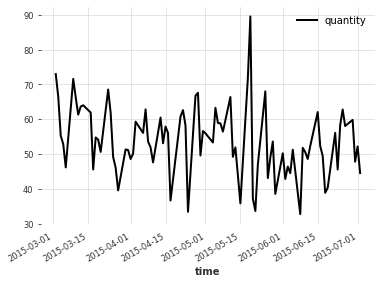

In [15]:
tsQty = TimeSeries.from_dataframe(dfQty)
tsQty.plot()

In [39]:
model = ExponentialSmoothing()
model.fit(tsQty)

In [26]:
tsQty.tail()

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[58.07]],

       [[59.83]],

       [[47.84]],

       [[52.2 ]],

       [[44.57]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-06-26 2015-06-29 ... 2015-07-02
  * component  (component) object 'quantity'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

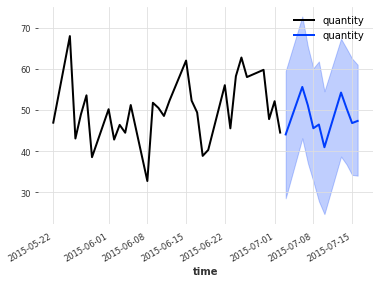

In [40]:
tsPred = model.predict(10, num_samples=100)
tsQty[-30:].plot()
tsPred.plot()

In [36]:
backtest = model.historical_forecasts(tsQty, start=0.6, forecast_horizon=3, verbose=True)

  0%|          | 0/35 [00:00<?, ?it/s]

In [43]:
backtest = model.historical_forecasts(tsQty, start=pd.Timestamp('2015-05-15'), forecast_horizon=3, verbose=True)

  0%|          | 0/33 [00:00<?, ?it/s]

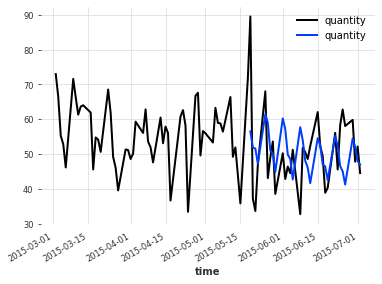

In [44]:
tsQty.plot()
backtest.plot()